### Before you Start Running This Notebook

Before you begin, you will need to set up a few essential development tools. 

While not required, it is recommended first to set up a virtual environment using venv or Conda. This ensures that one of the required versions of Python (3.9+) is used and there are no dependency conflicts. It often comes preinstalled, like in GitHub Codespaces and some Linux distributions. You can quickly check that by running.

    conda --version

And if it is not installed, you can follow the ([miniconda instructions](https://docs.conda.io/en/latest/miniconda.html) ) for a quick clean setup.

Once you have Conda installed on your system, you can create a new environment with:

    conda create -n 580PEMdemo python=3.9.16 jupyter numpy
    conda activate 580PEMdemo
    pip install Cython
    git clone -b develop https://github.com/amr8004/pycalphad.git
    cd pycalphad
    pip install -e .
    pip install git+https://github.com/amr8004/ESPEI.git
    

    conda init

Restart your terminal, and activate the environment with:

    conda activate 580PEMdemo

At this point, you should be able to run `jupyter notebook` and open this notebook in your browser with it or select the kernel `580PEMdemo` in VS Code (top-right corner) or other IDEs.

This notebook utilizes the pure element models and fitting functions implemented in custom version of pycalphad and ESPEI for pure element models. It allows for comparison between all 3 implemented models as opposed to the hard coded version which only takes 1 selected model into account

# Initialize

In [1]:
import numpy as np
import pycalphad.model as pype
from pycalphad.model import RWModelE,autoH,CSModelE,SRModelE,autoS,autoG, pe_dict, RTDB_globals, Define_Element
from espei import pureElement as pe
from espei.pureElement import imp_data_PE, Cp_fit, pe_inputJSON,pe_def_model, pe_iGuess
from matplotlib import pylab as plt

# Demo NonMagn

In [2]:
#Clears dictionary
dict.fromkeys(RTDB_globals, None)
print('clean')

clean


### Initial guess for Fitting
Initial guesses for included elements here, other elements can use similar values altered slightly if poor results are returned

#AL
initialGuessSR=[400, 1e5, 0, 650, 410]
initialGuessRW=[490, 1e-3, 1e-6]

#CR
initialGuessSR=[300, -0.009, 0, 1400, 100]
initialGuessRW=[300, 1e-3, 1e-6]

#CU
initialGuessSR=[200, 0, 0, 1000, 210]
initialGuessRW=[490, 1e-3, 1e-6]

#MO
initialGuessSR=[300, 0, 0, 750, 200]
initialGuessRW=[490, 1e-3, 1e-6]

#NB
initialGuessSR=[200, 1e5, 0, 650, 410]
initialGuessRW=[490, 1e-3, 1e-6]

#W
initialGuessSR=[100, 0, 0, 1000, 100]
initialGuessRW=[200, 1e-3, 1e-6]

In [3]:
Define_Element(['AL'])
dataset=imp_data_PE("AL_CP2.json")
T_range = np.linspace(1,dataset.Temp.max()*1.1,num=200)

In [4]:
initialGuessSR=[200, 1e5, 0, 650, 410]
initialGuessRW=[490, 1e-3, 1e-6]

In [5]:
parmNamesSR = ['Theta_E','beta1','beta2','tau','gamma']
fit_paramsSRE = Cp_fit(SRModelE, initialGuess=initialGuessSR, parmNames=parmNamesSR, data_df=dataset)
CpResSre = SRModelE(T_range, *fit_paramsSRE)
SRE = fit_paramsSRE[0]
RTDB_globals['k1_final'] = fit_paramsSRE[1]
RTDB_globals['k2_final'] = fit_paramsSRE[2]
RTDB_globals['alfa_final'] = fit_paramsSRE[3]
RTDB_globals['g_final'] = fit_paramsSRE[4]


Non-linear least squares
Model: SRModelE

           Estimate         StdErr       tval      pval
Theta_E  288.365881       7.409227  38.919831  0.000000
beta1      0.002792       0.006451   0.432797  0.665466
beta2      0.011719       4.209451   0.002784  0.997781
tau      492.569210  154860.173793   0.003181  0.997464
gamma    431.303360  154954.408270   0.002783  0.997781

Residual Standard Error:  0.8873
Df: 307
AIC: 817.7690143754804


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\espei\pureElement.py:85: RuntimeWarning: invalid value encountered in sqrt
  parmSE = np.diag( np.sqrt( cov ) )


In [6]:
parmNamesRW = ['ThetaE','a','b']
fit_paramsRW = Cp_fit(RWModelE, initialGuess=initialGuessRW, parmNames=parmNamesRW, data_df=dataset)
CpResRW = RWModelE(T_range, *fit_paramsRW)
RWE = fit_paramsRW[0]
RWa=fit_paramsRW[1]
RWb=fit_paramsRW[2]


Non-linear least squares
Model: RWModelE

          Estimate        StdErr        tval          pval
ThetaE  287.986467  2.348131e+00  122.644978  0.000000e+00
a         0.002051  5.407053e-04    3.793336  1.787957e-04
b         0.000007  8.691540e-07    7.721886  1.607603e-13

Residual Standard Error:  0.8847
Df: 309
AIC: 813.9852612352179


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\espei\pureElement.py:85: RuntimeWarning: invalid value encountered in sqrt
  parmSE = np.diag( np.sqrt( cov ) )


In [7]:
fit_paramsCS = Cp_fit(CSModelE, initialGuess=initialGuessRW, parmNames=parmNamesRW, data_df=dataset)
CpResCS = CSModelE(T_range, *fit_paramsCS)
CSa=fit_paramsCS[1]
CSb=fit_paramsCS[2]
CSE=fit_paramsCS[0]

Non-linear least squares
Model: CSModelE

            Estimate        StdErr        tval          pval
ThetaE  2.944909e+02  2.200589e+00  133.823647  0.000000e+00
a       5.002202e-03  2.481935e-04   20.154446  0.000000e+00
b       4.132811e-12  7.472436e-13    5.530742  6.798562e-08

Residual Standard Error:  0.9198
Df: 309
AIC: 838.2261958310742


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\espei\pureElement.py:85: RuntimeWarning: invalid value encountered in sqrt
  parmSE = np.diag( np.sqrt( cov ) )


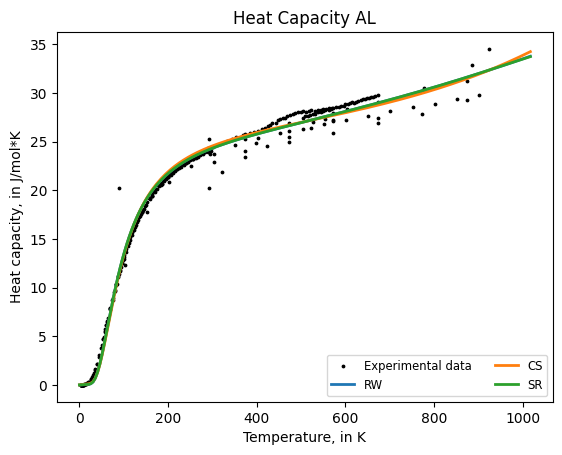

In [8]:
plt.scatter(dataset.Temp, dataset.Cp, color='k', s=3)
plt.plot(T_range,CpResRW,linewidth=2)
plt.plot(T_range,CpResCS,linewidth=2)
plt.plot(T_range, CpResSre,linewidth=2)
plt.xlabel("Temperature, in K")
plt.ylabel("Heat capacity, in J/mol*K")
plt.legend(['Experimental data','RW','CS','SR'],ncol=2, fontsize='small', loc='lower right')
plt.title('Heat Capacity '+ RTDB_globals['element'][0])
plt.show()

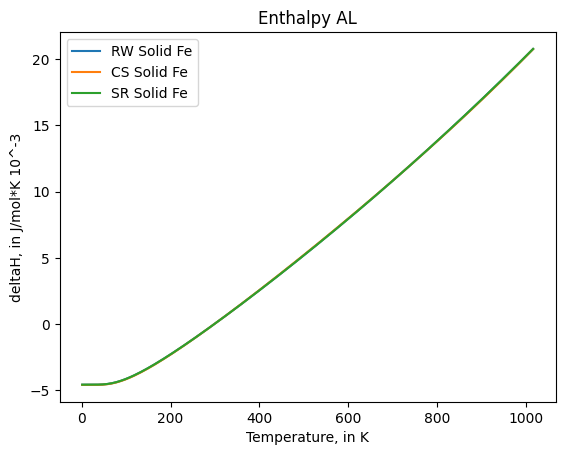

In [9]:
HCS298=pype.HTCSM(298.15,CSa,CSb)+pype.HEin(CSE,298.15)#+pype.HM(T_range)[29]
HSR298=pype.HTBCM(298.15,RTDB_globals['k1_final'], RTDB_globals['k2_final'], RTDB_globals['alfa_final'], RTDB_globals['g_final'])+pype.HEin(SRE,298.15)#+pype.HM(T_range)[149]
HRW298=pype.HTRWM(298.15,RWa,RWb)+pype.HEin(RWE,298.15)#+pype.HM(T_range)[149]
HCS=pype.HTCSM(T_range,CSa,CSb)+pype.HEin(CSE,T_range)#+pype.HM(T_range)
HCS2=HCS-HCS298
HSR2=pype.HTBCM(T_range,RTDB_globals['k1_final'], RTDB_globals['k2_final'], RTDB_globals['alfa_final'], RTDB_globals['g_final'])+pype.HEin(SRE,T_range)#+pype.HM(T_range)
HSR=HSR2-HSR298
HRW2=pype.HTRWM(T_range,RWa,RWb)+pype.HEin(RWE,T_range)#+pype.HM(T_range)
HRW=HRW2-HRW298
plt.plot(T_range,10**-3*HRW,label='RW Solid Fe')
plt.plot(T_range,10**-3*HCS2,label='CS Solid Fe')
plt.plot(T_range,10**-3*HSR,label='SR Solid Fe')
plt.xlabel("Temperature, in K")
plt.ylabel("deltaH, in J/mol*K 10^-3")
plt.title("H_Ein+H_BCM-H298.15")
plt.title('Enthalpy '+RTDB_globals['element'][0])
plt.legend()

In [10]:
RWa


0.0020510769262633622

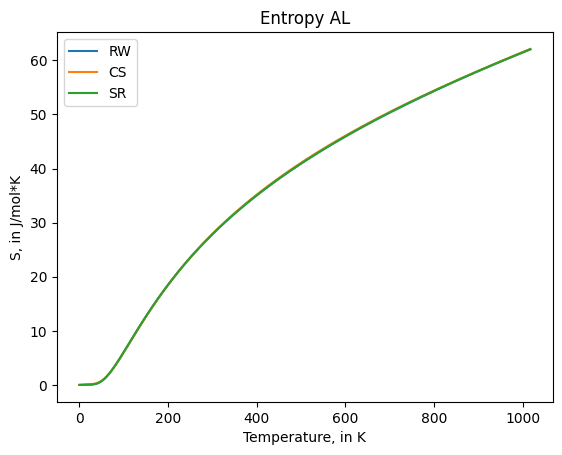

In [11]:
SE1=pype.SEin(SRE,T_range)
SBCM1=pype.STBCM(T_range, RTDB_globals['k1_final'], RTDB_globals['k2_final'], RTDB_globals['alfa_final'], RTDB_globals['g_final'])
#Smag=pype.SM(T_range)
Scomb=SBCM1+SE1#+Smag
SRW=pype.STRWM(T_range,RWa,RWb)+pype.SEin(RWE,T_range)#+Smag
SCS=pype.STCSM(T_range,CSa,CSb)+pype.SEin(CSE,T_range)#+Smag
plt.plot(T_range,SRW,label = 'RW')
plt.plot(T_range,SCS,label = 'CS')
plt.plot(T_range,Scomb,label = 'SR')
plt.xlabel("Temperature, in K")
plt.ylabel("S, in J/mol*K")
plt.title("Entropy "+ RTDB_globals['element'][0])
plt.legend()

-150.455578862801 <class 'numpy.ndarray'> 200
0.002054432680260609 <class 'numpy.ndarray'> 200
sr


Text(0.5, 1.0, 'Gibbs AL')

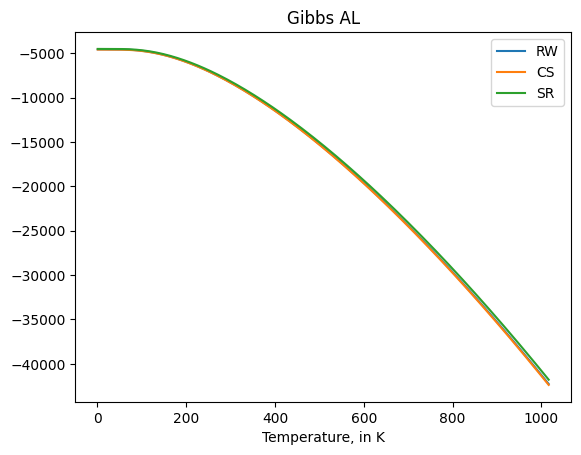

In [12]:
GRW=pype.GTRWM(T_range,RWa,RWb)
GRW1=GRW+pype.GEin(RWE,T_range)
plt.plot(T_range,GRW1,label='RW')
GCStest=pype.GTCSM(T_range,CSa,CSb)
GCS1=GCStest+pype.GEin(CSE,T_range)
plt.plot(T_range,GCS1,label='CS')
GSR=autoG(T_range,'SRModelE')
plt.plot(T_range,GSR, label = 'SR')
plt.xlabel("Temperature, in K")
plt.legend()
plt.title("Gibbs "+ RTDB_globals['element'][0])

## Magnetic model

#NI
initialGuessSR=[200, 1e5, 0, 1500, 810]
initialGuessRW=[490, 1e-3, 1e-6]

In [13]:
#Clears dictionary
a=dict.fromkeys(RTDB_globals, None)
print('clean')

clean


In [14]:
Define_Element(['FE'])
dataset=imp_data_PE("FE_CP.json")
T_range = np.arange(0.15,dataset.Temp.max()*1.1,2)

In [15]:
initialGuessSR=[350, 0.008, 0.000, 1400, 100]
initialGuessRW=[490, 1e-3, 1e-6]

In [16]:
parmNamesSR = ['Theta_E','beta1','beta2','tau','gamma']
fit_paramsSRE = Cp_fit(SRModelE, initialGuess=initialGuessSR, parmNames=parmNamesSR, data_df=dataset)
CpResSre = SRModelE(T_range, *fit_paramsSRE)
SRE = fit_paramsSRE[0]
RTDB_globals['k1_final'] = fit_paramsSRE[1]
RTDB_globals['k2_final'] = fit_paramsSRE[2]
RTDB_globals['alfa_final'] = fit_paramsSRE[3]
RTDB_globals['g_final'] = fit_paramsSRE[4]


Non-linear least squares
Model: SRModelE

            Estimate      StdErr       tval      pval
Theta_E   307.882707   10.045819  30.647846  0.000000
beta1       0.007211    0.000212  34.028872  0.000000
beta2       0.012864    0.008462   1.520139  0.128897
tau      1487.729513  147.336833  10.097472  0.000000
gamma      96.930950  422.570342   0.229384  0.818633

Residual Standard Error:  4.4275
Df: 751
AIC: 4402.030412086555


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\espei\pureElement.py:85: RuntimeWarning: invalid value encountered in sqrt
  parmSE = np.diag( np.sqrt( cov ) )
c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1721: RuntimeWarning: overflow encountered in exp
  f1 = np.exp(Theta_E/i)/(np.exp(Theta_E/i)-1)**2.0
c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1721: RuntimeWarning: invalid value encountered in scalar divide
  f1 = np.exp(Theta_E/i)/(np.exp(Theta_E/i)-1)**2.0


In [17]:
parmNamesRW = ['ThetaE','a','b']
fit_paramsRW = Cp_fit(RWModelE, initialGuess=initialGuessRW, parmNames=parmNamesRW, data_df=dataset)
CpResRW = RWModelE(T_range, *fit_paramsRW)
RWE = fit_paramsRW[0]
RWa=fit_paramsRW[1]
RWb=fit_paramsRW[2]


Non-linear least squares
Model: RWModelE

          Estimate        StdErr       tval      pval
ThetaE  303.523974  1.024913e+01  29.614621  0.000000
a         0.005902  6.463313e-04   9.131925  0.000000
b         0.000001  5.101697e-07   2.727674  0.006527

Residual Standard Error:  4.4474
Df: 753
AIC: 4406.824811824962


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\espei\pureElement.py:85: RuntimeWarning: invalid value encountered in sqrt
  parmSE = np.diag( np.sqrt( cov ) )
c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1637: RuntimeWarning: overflow encountered in exp
  Cv_E = koef * (Te / T) ** 2 * np.exp(Te / T) / (np.exp(Te / T) - 1) ** 2
c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1637: RuntimeWarning: invalid value encountered in divide
  Cv_E = koef * (Te / T) ** 2 * np.exp(Te / T) / (np.exp(Te / T) - 1) ** 2


In [18]:
fit_paramsCS = Cp_fit(CSModelE, initialGuess=initialGuessRW, parmNames=parmNamesRW, data_df=dataset)
CpResCS = CSModelE(T_range, *fit_paramsCS)
CSa=fit_paramsCS[1]
CSb=fit_paramsCS[2]
CSE=fit_paramsCS[0]

Non-linear least squares
Model: CSModelE

            Estimate        StdErr       tval      pval
ThetaE  3.060923e+02  1.007514e+01  30.380952  0.000000
a       6.839366e-03  2.895062e-04  23.624246  0.000000
b       3.392220e-13  1.028031e-13   3.299725  0.001013

Residual Standard Error:  4.4373
Df: 753
AIC: 4403.393861151514


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\espei\pureElement.py:85: RuntimeWarning: invalid value encountered in sqrt
  parmSE = np.diag( np.sqrt( cov ) )
c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1637: RuntimeWarning: overflow encountered in exp
  Cv_E = koef * (Te / T) ** 2 * np.exp(Te / T) / (np.exp(Te / T) - 1) ** 2
c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1637: RuntimeWarning: invalid value encountered in divide
  Cv_E = koef * (Te / T) ** 2 * np.exp(Te / T) / (np.exp(Te / T) - 1) ** 2


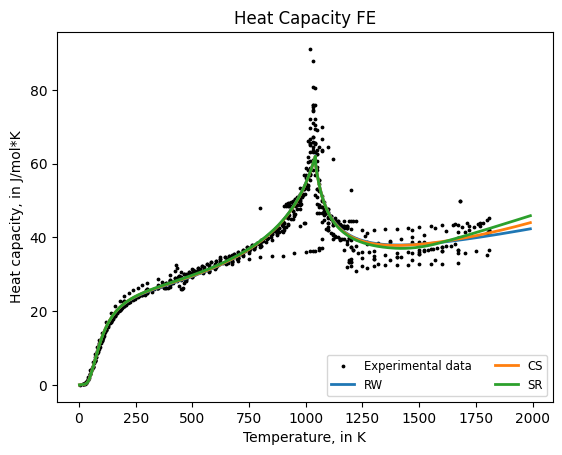

In [19]:
plt.scatter(dataset.Temp, dataset.Cp, color='k', s=3)
plt.plot(T_range,CpResRW,linewidth=2)
plt.plot(T_range,CpResCS,linewidth=2)
plt.plot(T_range, CpResSre,linewidth=2)
plt.xlabel("Temperature, in K")
plt.ylabel("Heat capacity, in J/mol*K")
plt.legend(['Experimental data','RW','CS','SR'],ncol=2, fontsize='small', loc='lower right')
plt.title('Heat Capacity '+ RTDB_globals['element'][0])
plt.show()

298.15


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1845: RuntimeWarning: overflow encountered in exp
  he = koef*Te/(np.exp(Te/x)-1)


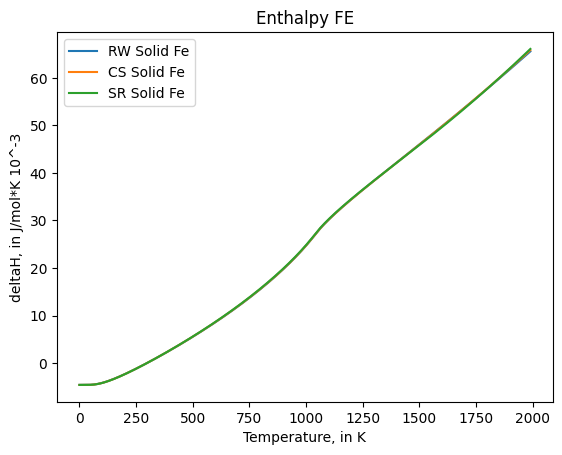

In [20]:
print(T_range[149])
HCS298=pype.HTCSM(298.15,CSa,CSb)+pype.HEin(CSE,298.15)+pype.HM(T_range)[149]
HSR298=pype.HTBCM(298.15,RTDB_globals['k1_final'], RTDB_globals['k2_final'], RTDB_globals['alfa_final'], RTDB_globals['g_final'])+pype.HEin(SRE,298.15)+pype.HM(T_range)[149]
HRW298=pype.HTRWM(298.15,RWa,RWb)+pype.HEin(RWE,298.15)+pype.HM(T_range)[149]
HCS=pype.HTCSM(T_range,CSa,CSb)+pype.HEin(CSE,T_range)+pype.HM(T_range)
HCS2=HCS-HCS298
HSR2=pype.HTBCM(T_range,RTDB_globals['k1_final'], RTDB_globals['k2_final'], RTDB_globals['alfa_final'], RTDB_globals['g_final'])+pype.HEin(SRE,T_range)+pype.HM(T_range)
HSR=HSR2-HSR298
HRW2=pype.HTRWM(T_range,RWa,RWb)+pype.HEin(RWE,T_range)+pype.HM(T_range)
HRW=HRW2-HRW298
plt.plot(T_range,10**-3*HRW,label='RW Solid Fe')
plt.plot(T_range,10**-3*HCS2,label='CS Solid Fe')
plt.plot(T_range,10**-3*HSR,label='SR Solid Fe')
plt.xlabel("Temperature, in K")
plt.ylabel("deltaH, in J/mol*K 10^-3")
plt.title("H_Ein+H_BCM-H298.15")
plt.title('Enthalpy '+RTDB_globals['element'][0])
plt.legend()

c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1855: RuntimeWarning: overflow encountered in exp
  e1=np.exp(Te/x)
c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1858: RuntimeWarning: invalid value encountered in divide
  se = -1*koef* (np.log(e2) - Te * e1/(x * e2))


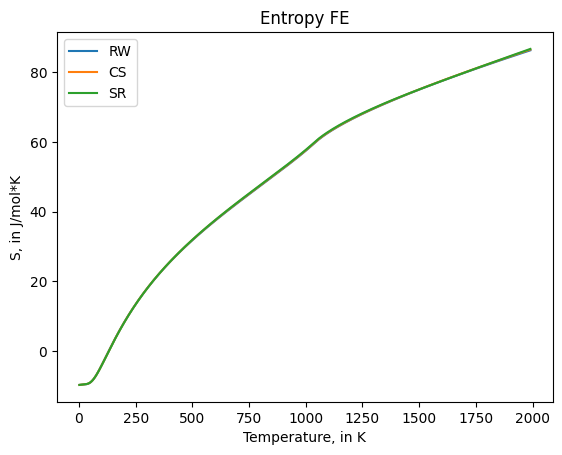

In [21]:
SE1=pype.SEin(SRE,T_range)
SBCM1=pype.STBCM(T_range, RTDB_globals['k1_final'], RTDB_globals['k2_final'], RTDB_globals['alfa_final'], RTDB_globals['g_final'])
Smag=pype.SM(T_range)
Scomb=SBCM1+SE1+Smag
SRW=pype.STRWM(T_range,RWa,RWb)+pype.SEin(RWE,T_range)+Smag
SCS=pype.STCSM(T_range,CSa,CSb)+pype.SEin(CSE,T_range)+Smag
plt.plot(T_range,SRW,label = 'RW')
plt.plot(T_range,SCS,label = 'CS')
plt.plot(T_range,Scomb,label = 'SR')
plt.xlabel("Temperature, in K")
plt.ylabel("S, in J/mol*K")
plt.title("Entropy "+ RTDB_globals['element'][0])
plt.legend()

-274.6294006598806 <class 'numpy.ndarray'> 996
0.0001328029480821256 <class 'numpy.ndarray'> 996
sr


c:\Users\xander\anaconda3\envs\PESPEIv2\lib\site-packages\pycalphad\model.py:1869: RuntimeWarning: overflow encountered in exp
  Ge = koef*(x*np.log(np.exp(Te/x)-1)-Te) - HEin(Te, 298.15)


Text(0.5, 1.0, 'Gibbs FE')

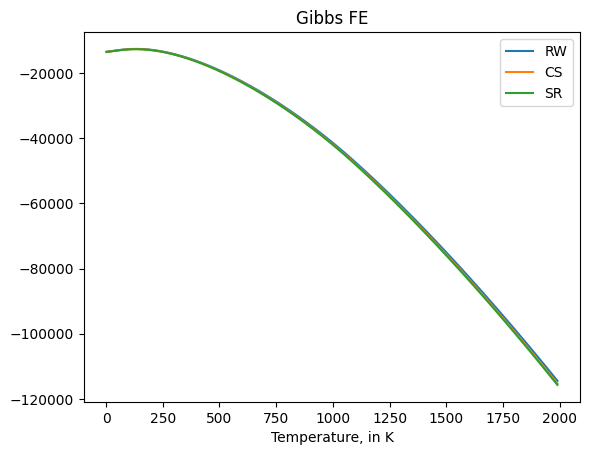

In [22]:
GRW=pype.GTRWM(T_range,RWa,RWb)
GRW1=GRW+pype.GEin(SRE,T_range)+pype.GibbsM_Bosse(T_range)
plt.plot(T_range,GRW1,label='RW')
GCStest=pype.GTCSM(T_range,CSa,CSb)
GCS1=GCStest+pype.GEin(CSE,T_range)+pype.GibbsM_Bosse(T_range)
plt.plot(T_range,GCS1,label='CS')
GSR=autoG(T_range,'SRModelE')
plt.plot(T_range,GSR, label = 'SR')
plt.xlabel("Temperature, in K")
plt.legend()
plt.title("Gibbs "+ RTDB_globals['element'][0])